In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [45]:
X = 6*np.random.rand(200,1)-3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)
# y = 0.8x^2 + 0.9x + 2

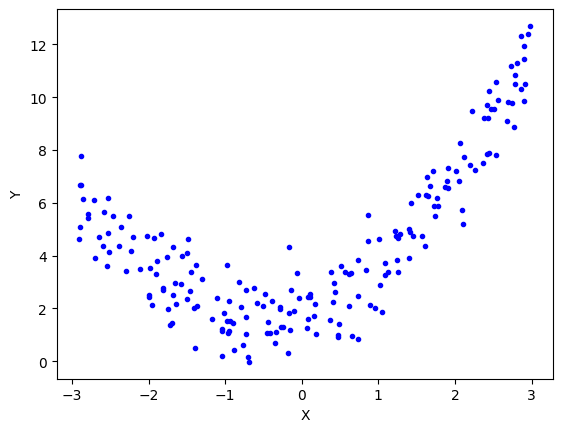

In [46]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [47]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [48]:
# Applying LR
lr = LinearRegression()

In [49]:
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.47235650592200407

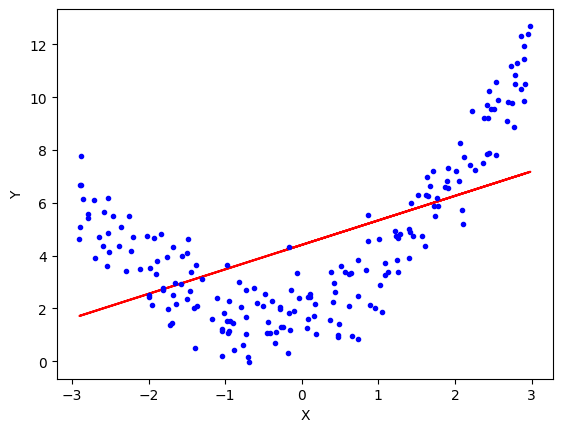

In [51]:
plt.plot(X_train,lr.predict(X_train),color = 'r')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [52]:
# Applying polynomial LinearRegression
# degree 2
poly = PolynomialFeatures(degree = 2)
#poly = PolynomialFeatures(degree = 2,include_bias = False)  # for taking only the corfficient..

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [53]:
print(X_train[0])
print(X_train_trans[0])

[2.90197257]
[1.         2.90197257 8.42144479]


In [54]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.88826985944917

In [56]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.89264039 0.82778541]]
[1.90158755]


In [57]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

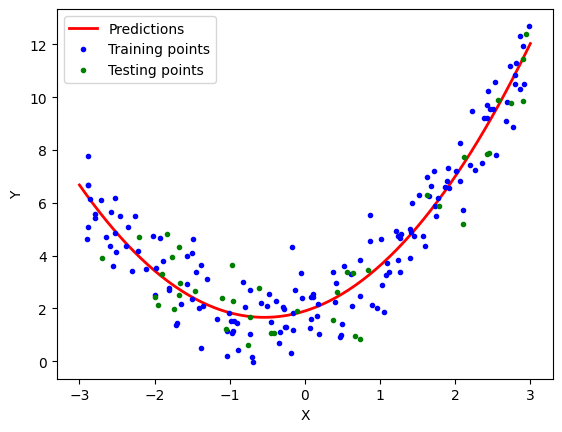

In [58]:
plt.plot(X_new,y_new,'r-',linewidth = 2,label = 'Predictions')
plt.plot(X_train,y_train,'b.',label = 'Training points')
plt.plot(X_test,y_test,'g.',label = 'Testing points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [59]:
# Function for different degress
def polynomial_regrssion(degree):
  X_new = np.linspace(-3,3,100).reshape(100,1)
  X_new_poly = poly.transform(X_new)

  polybig_features = PolynomialFeatures(degree = degree,include_bias = False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
      ('poly_features',polybig_features),
      ('std_scaler',std_scaler),
      ('lin_reg',lin_reg),
  ])
  polynomial_regression.fit(X,y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new,y_newbig,'r',label = "Degree"+str(degree),linewidth = 2)

  plt.plot(X_train,y_train,'b.',linewidth = 3)
  plt.plot(X_test,y_test,'g.',linewidth = 3)
  plt.xlabel('X')
  plt.legend(loc = 'upper left')
  plt.ylabel('y')
  plt.axis([-3,3,0,10])
  plt.show()

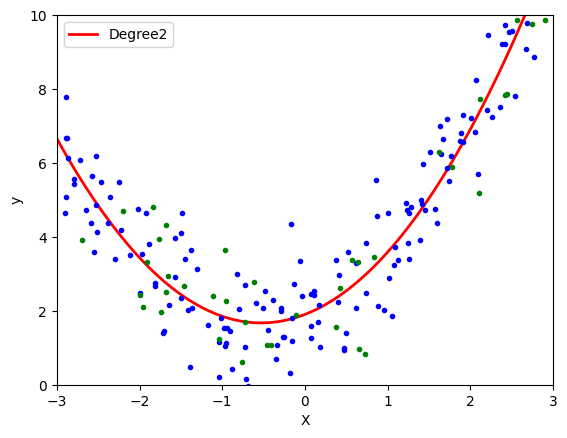

In [60]:
polynomial_regrssion(2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


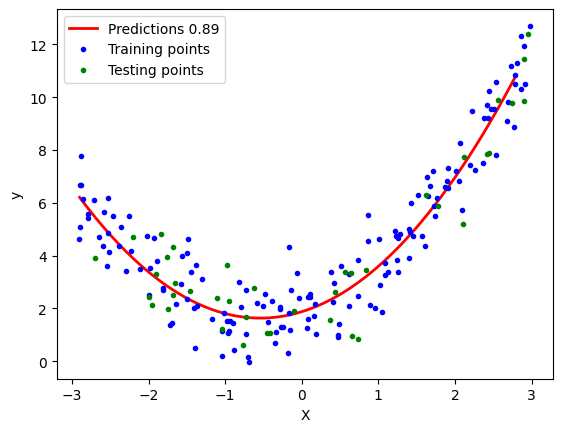

In [63]:
# Applying Gradient Descent
poly = PolynomialFeatures(degree = 2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
""" Above was for 1 input column and 1 output column what if we have more than 1 input columns ..."""

In [64]:
# 3-D polynomial regression
x = 7*np.random.rand(100,1)-2.8
y = 7*np.random.rand(100,1)-2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [65]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df,x=x.ravel(),y = y.ravel(),z=z.ravel())
fig.show()

In [70]:
# Linear Regression without any polunomial features ..
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(),x.max(),10)
y_input = np.linspace(y.min(),y.max(),10)
xGrid,yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [71]:
import plotly.graph_objects as go
fig = px.scatter_3d(df,x=x.ravel(),y = y.ravel(),z = z.ravel())

fig.add_trace(go.Surface(x = x_input,y = y_input,z = z_final))
fig.show()

In [72]:
# Now we will apply polynomial features
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [89]:
poly = PolynomialFeatures(degree = 6)
X_multi_trans = poly.fit_transform(X_multi)

In [90]:
print("Input",poly.n_features_in_)
print("Output",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Output 28
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]
 [6 0]
 [5 1]
 [4 2]
 [3 3]
 [2 4]
 [1 5]
 [0 6]]


In [91]:
X_multi.shape

(100, 2)

In [92]:
X_multi_trans.shape

(100, 28)

In [93]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)


LinearRegression()

In [94]:
X_test_multi = poly.transform(final)


In [95]:
z_final = lr.predict(X_multi_trans).reshape(10,10)


In [96]:
fig = px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.update_layout(scene = dict(zaxis = dict(range = [0,35])))
fig.show()

In [ ]:
# If degree is  more then there will be overfitting we will not get general form ....
